In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
import itertools

In [70]:
df_raw = pd.DataFrame()
for f in glob.glob("experiments_results\\*.xlsx"):
    print(f)
    df_raw = pd.concat([df_raw, pd.read_excel(f)])
df_raw.info()

experiments_results\25-06-2025_17-16-12_675.xlsx
experiments_results\25-06-2025_19-24-18_225.xlsx
experiments_results\25-06-2025_19-40-32_225.xlsx
<class 'pandas.core.frame.DataFrame'>
Index: 1125 entries, 0 to 224
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Unnamed: 0                                                    1125 non-null   int64  
 1   Загруженность ресурсов (%)                                    1125 non-null   float64
 2   Общий пробег                                                  1125 non-null   float64
 3   Соблюдение временных окон (%)                                 1125 non-null   float64
 4   Равномерность распределения нагрузки (StdDev of Earnings)     1125 non-null   float64
 5   Равномерность распределения нагрузки (StdDev of Time)         1125 non-null   float64
 6   Равномерность распр

In [71]:
df_raw

Unnamed: 0  Загруженность ресурсов (%)  Общий пробег  \
0             0                   16.467779   2024.163251   
1             1                   22.720940   2723.400262   
2             2                   51.454907   5752.907972   
3             3                   56.378360   6942.730206   
4             4                   61.679043   8157.660308   
..          ...                         ...           ...   
220         220                    6.196486   1092.722948   
221         221                    7.659360   1446.591672   
222         222                    2.850299    743.404356   
223         223                    6.275790   1006.083304   
224         224                    4.780289   1354.442268   

     Соблюдение временных окон (%)  \
0                        50.000000   
1                        64.516129   
2                        27.118644   
3                        30.000000   
4                        25.000000   
..                             ...   
220                      22.222222   
221                      33.333333   
222                       0.000000   
223                      20.000000   
224                      15.384615   

     Равномерность распределения нагрузки (StdDev of Earnings)  \
0                                           964.465847           
1                                          1073.491495           
2                                          3852.407430           
3                                          3149.894127           
4                                          4808.387564           
..                                                 ...           
220                                        1044.407426           
221                                        1368.552239           
222                                         311.640079           
223                                        2363.733385           
224                                         956.967042           

     Равномерность распределения нагрузки (StdDev of Time)  \
0                                            69.880468       
1                                            73.085222       
2                                           275.040028       
3                                           162.869736       
4                                           306.667567       
..                                                 ...       
220                                          47.169782       
221                                          71.976106       
222                                          19.024302       
223                                          79.556578       
224                                          54.187423       

     Равномерность распределения нагрузки (StdDev of Count Tasks)  \
0                                             1.673320              
1                                             2.085066              
2                                             5.995623              
3                                             4.888763              
4                                             8.482924              
..                                                 ...              
220                                           0.688749              
221                                           1.176595              
222                                           0.330719              
223                                           1.112430              
224                                           1.723187              

     Среднее время выполнения заказа  Количество сообщений  \
0                          54.852544                   862   
1                          37.518919                  1728   
2                         333.874424                  2644   
3                         123.251167                  3544   
4                         418.513812                  4350   
..                               ...                   ...   
220           

In [72]:
df_raw = pd.read_excel("experiments_results\\23-06-2025_14-59-53_196.xlsx")
df_raw[:3]

FileNotFoundError: [Errno 2] No such file or directory: 'experiments_results\\23-06-2025_14-59-53_196.xlsx'

In [73]:
list(df_raw.columns)

['Unnamed: 0',
 'Загруженность ресурсов (%)',
 'Общий пробег',
 'Соблюдение временных окон (%)',
 'Равномерность распределения нагрузки (StdDev of Earnings)',
 'Равномерность распределения нагрузки (StdDev of Time)',
 'Равномерность распределения нагрузки (StdDev of Count Tasks)',
 'Среднее время выполнения заказа',
 'Количество сообщений',
 'Количество выполненных заказов',
 'Среднее время выполнения срочных заказов',
 'Среднее время выполнения несрочных заказов',
 'experiment_time',
 'tick_size',
 'time_stop',
 'num_orders',
 'urgent_percentage',
 'num_couriers',
 'map_size',
 'max_appearance_time',
 'avg_courier_speed',
 'velocity_range',
 'payload_range',
 'waite_response_timeout',
 'battery_load_velocity_A',
 'battery_load_velocity_B',
 'battery_load_velocity_C',
 'battery_capacity']

In [74]:
'Загруженность ресурсов (%)', 
'Общий пробег',
'Соблюдение временных окон (%)',
'Равномерность распределения нагрузки (StdDev of Earnings)',
'Среднее время выполнения заказа', 
'experiment_time', 
'tick_size',
'time_stop', 
'num_orders', 
'urgent_percentage', 
'num_couriers',
'map_size', 
'max_appearance_time', 
'avg_courier_speed',
'velocity_range', 
'payload_range'

'payload_range'

In [75]:
col_metrics = ['Загруженность ресурсов (%)',
 'Общий пробег',
 'Соблюдение временных окон (%)',
 'Равномерность распределения нагрузки (StdDev of Earnings)',
 'Равномерность распределения нагрузки (StdDev of Time)',
 'Равномерность распределения нагрузки (StdDev of Count Tasks)',
 'Среднее время выполнения заказа',
 'Количество сообщений',
 'Количество выполненных заказов',
 'Среднее время выполнения срочных заказов',
 'Среднее время выполнения несрочных заказов']

col_parameters = [
 'tick_size',
 'time_stop',
 'num_orders',
 'urgent_percentage',
 'num_couriers',
 'map_size',
 'max_appearance_time',
 'avg_courier_speed',
 'velocity_range',
 'payload_range',
 'waite_response_timeout',
 'battery_load_velocity_A',
 'battery_load_velocity_B',
 'battery_load_velocity_C',
 'battery_capacity']


In [63]:
df

Unnamed: 0  Загруженность ресурсов (%)  Общий пробег  \
0             0                   16.467779   2024.163251   
1             1                   22.720940   2723.400262   
2             2                   51.454907   5752.907972   
3             3                   56.378360   6942.730206   
4             4                   61.679043   8157.660308   
..          ...                         ...           ...   
220         220                    5.081474    849.861117   
221         221                    6.060391   1380.660524   
222         222                    2.271169    372.865930   
223         223                    5.344700    943.052762   
224         224                   12.306659   1736.688302   

     Соблюдение временных окон (%)  \
0                        50.000000   
1                        64.516129   
2                        27.118644   
3                        30.000000   
4                        25.000000   
..                             ...   
220                      12.500000   
221                      28.571429   
222                       0.000000   
223                      22.222222   
224                      13.333333   

     Равномерность распределения нагрузки (StdDev of Earnings)  \
0                                           964.465847           
1                                          1073.491495           
2                                          3852.407430           
3                                          3149.894127           
4                                          4808.387564           
..                                                 ...           
220                                         978.949569           
221                                        1226.987393           
222                                         628.737200           
223                                        1657.025262           
224                                        4132.834887           

     Равномерность распределения нагрузки (StdDev of Time)  \
0                                            69.880468       
1                                            73.085222       
2                                           275.040028       
3                                           162.869736       
4                                           306.667567       
..                                                 ...       
220                                          60.220015       
221                                          59.652011       
222                                          24.938578       
223                                          65.410823       
224                                         143.169827       

     Равномерность распределения нагрузки (StdDev of Count Tasks)  \
0                                             1.673320              
1                                             2.085066              
2                                             5.995623              
3                                             4.888763              
4                                             8.482924              
..                                                 ...              
220                                           0.842615              
221                                           1.441354              
222                                           0.435890              
223                                           0.961444              
224                                           1.607599              

     Среднее время выполнения заказа  Количество сообщений  \
0                          54.852544                   862   
1                          37.518919                  1728   
2                         333.874424                  2644   
3                         123.251167                  3544   
4                         418.513812                  4350   
..                               ...                   ...   
220           

In [76]:
df = df_raw.groupby(col_parameters).mean().reset_index()

In [77]:
new_metric_name = "Отношение загруженности к количеству заказов"
df[new_metric_name] = df['Загруженность ресурсов (%)']/df['num_orders']
if not new_metric_name in col_metrics:
    col_metrics.append(new_metric_name)

new_metric_name = "Средний пробег одного курьера"
df[new_metric_name] = df['Общий пробег']/df['num_orders']
if not new_metric_name in col_metrics:
    col_metrics.append(new_metric_name)

In [78]:
normal_values = {}
not_one_unuque_params = []
for col in col_parameters:
    l_unique = list(df[col].unique())
    print(col, l_unique[len(l_unique)//2], l_unique, sep=",\t")
    normal_values[col] = l_unique[len(l_unique)//2]
    if len(l_unique) > 1:
        not_one_unuque_params.append(col)
print("not_one_unuque_params:", not_one_unuque_params)

tick_size,	1,	[np.int64(1)]
time_stop,	240,	[np.int64(240)]
num_orders,	80,	[np.int64(5), np.int64(10), np.int64(15), np.int64(20), np.int64(40), np.int64(60), np.int64(80), np.int64(100), np.int64(120), np.int64(140), np.int64(160), np.int64(180)]
urgent_percentage,	40,	[np.int64(0), np.int64(20), np.int64(40), np.int64(60), np.int64(80)]
num_couriers,	30,	[np.int64(20), np.int64(30), np.int64(40)]
map_size,	(100, 100),	['(100, 100)']
max_appearance_time,	220,	[np.int64(220)]
avg_courier_speed,	4,	[np.int64(4)]
velocity_range,	(2.0, 4.0),	['(2.0, 4.0)']
payload_range,	(10.0, 20.0),	['(10.0, 20.0)']
waite_response_timeout,	5,	[np.int64(5)]
battery_load_velocity_A,	0.1,	[np.float64(0.1)]
battery_load_velocity_B,	0.01,	[np.float64(0.01)]
battery_load_velocity_C,	0.3,	[np.float64(0.3)]
battery_capacity,	200,	[np.int64(100), np.int64(150), np.int64(200), np.int64(250), np.int64(300)]
not_one_unuque_params: ['num_orders', 'urgent_percentage', 'num_couriers', 'battery_capacity']


In [79]:
# вывод графика
def show_3axis(show_axes):
    fig, ax = plt.subplots(1, 1,figsize=(9, 4))

    x = df[show_axes[0]].unique()
    for z in df[show_axes[2]].unique():
        masks = []
        for norm_col, norm_val in normal_values.items():
            if norm_col in show_axes:
                continue
            masks.append(df[norm_col] == norm_val)
        masks.append(df[show_axes[2]] == z)
        mask = pd.concat(masks, axis=1).all(axis=1)
        y = df[mask][show_axes[1]]
        ax.plot(x, df[mask][show_axes[1]], label=f"{show_axes[2]}: {z}")

    ax.set_xlabel(show_axes[0])
    ax.set_ylabel(show_axes[1])
    ax.set_title(show_axes[1])
    plt.legend()


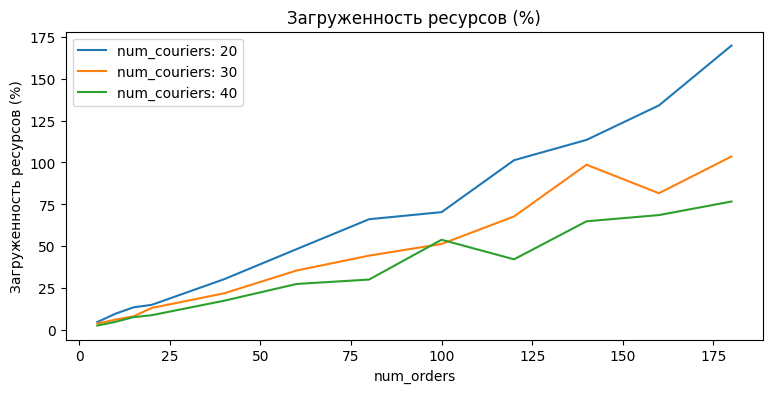

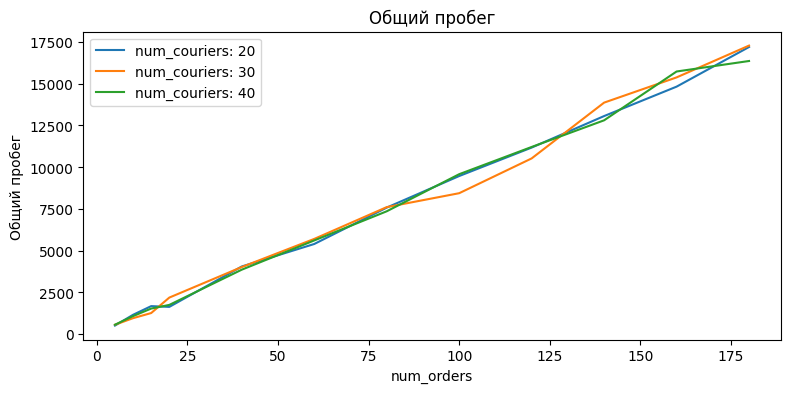

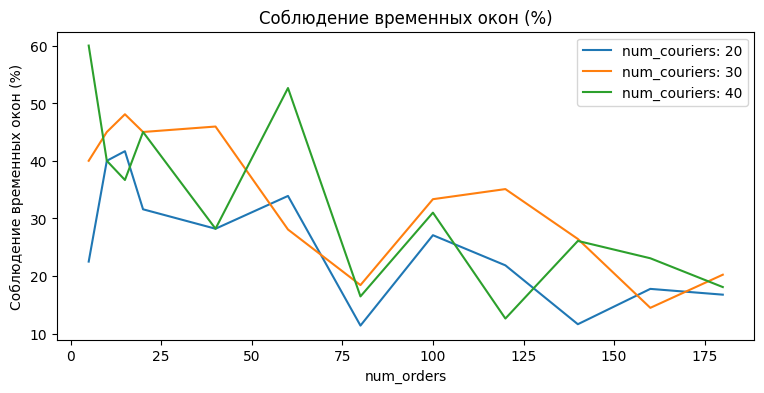

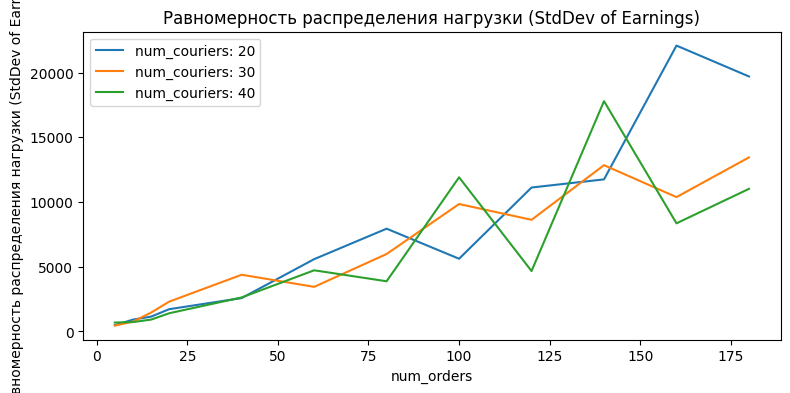

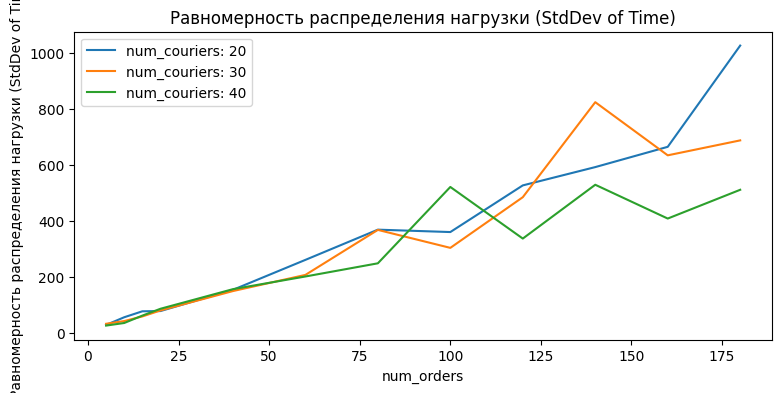

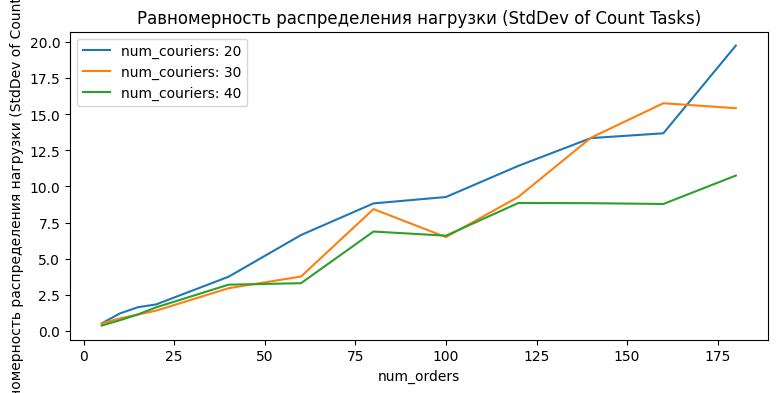

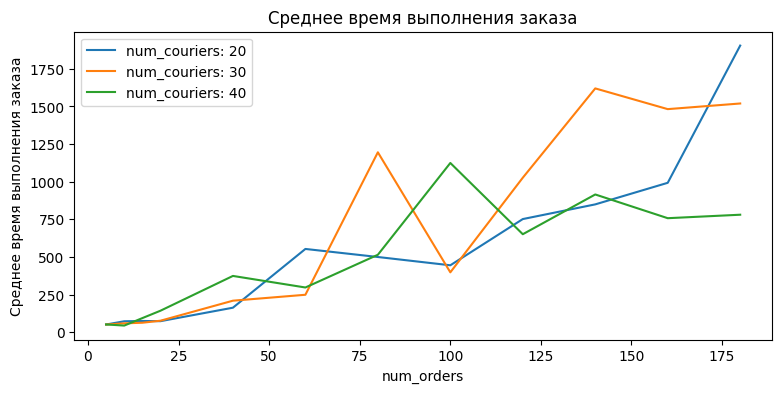

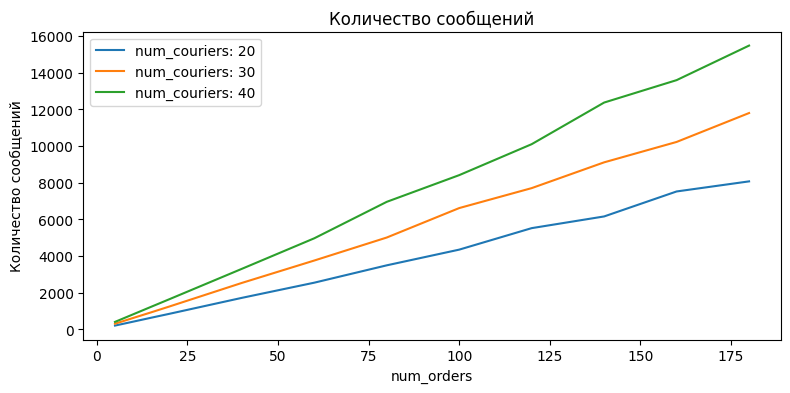

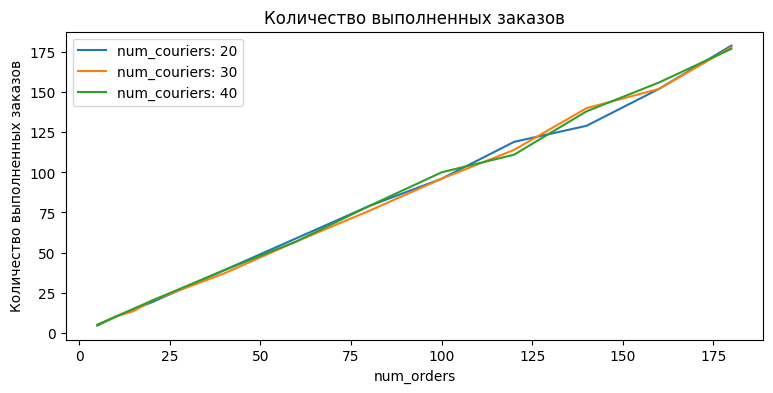

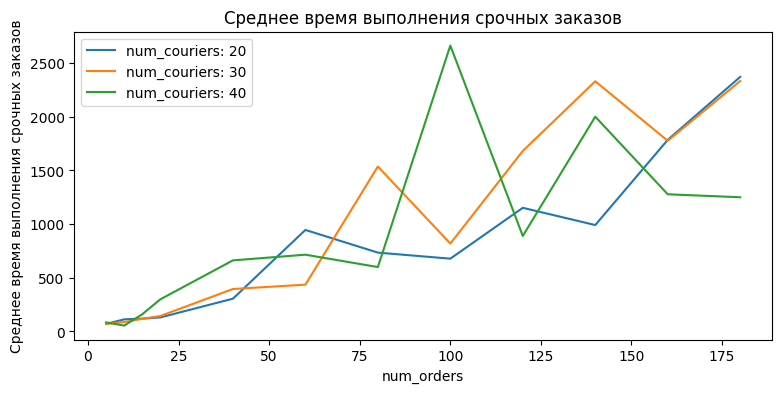

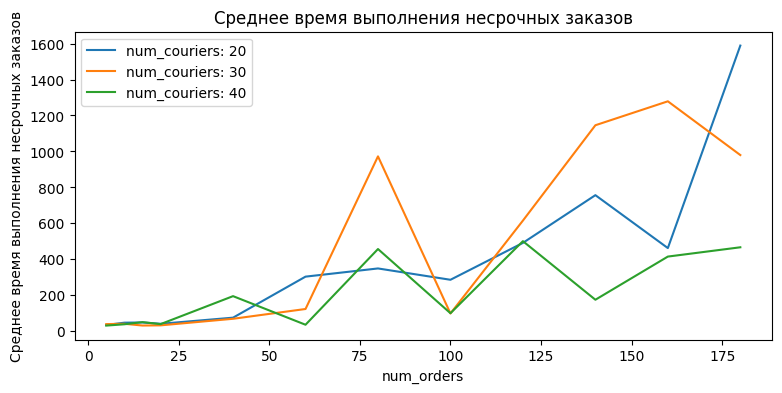

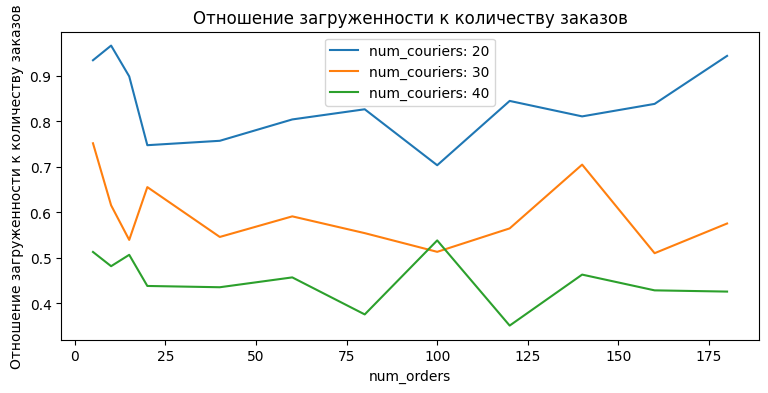

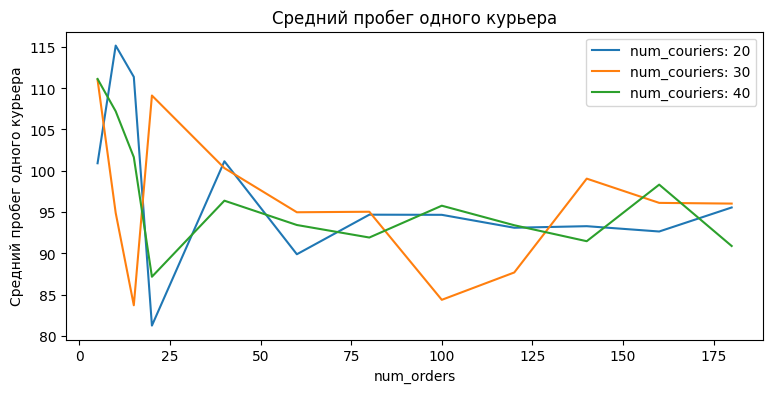

In [80]:
for col_metr in col_metrics:
    show_3axis(["num_orders", col_metr, "num_couriers"])

In [24]:
list(itertools.combinations(not_one_unuque_params, 2))

[('num_orders', 'urgent_percentage'),
 ('num_orders', 'num_couriers'),
 ('num_orders', 'battery_capacity'),
 ('urgent_percentage', 'num_couriers'),
 ('urgent_percentage', 'battery_capacity'),
 ('num_couriers', 'battery_capacity')]

C:\Users\Петренко\AppData\Local\Temp\ipykernel_10472\4282395791.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1,figsize=(9, 4))


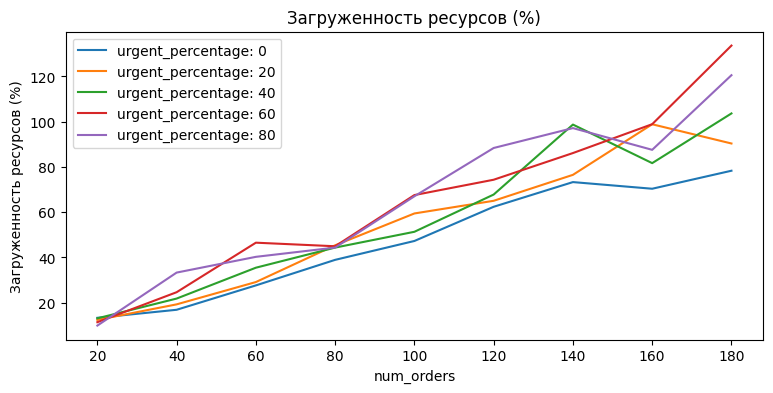

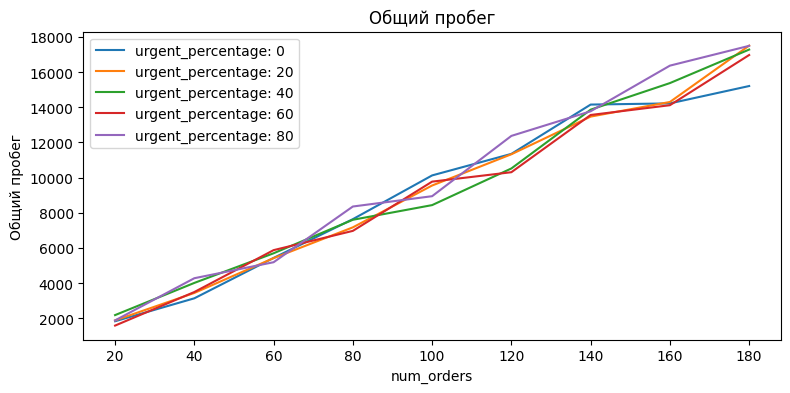

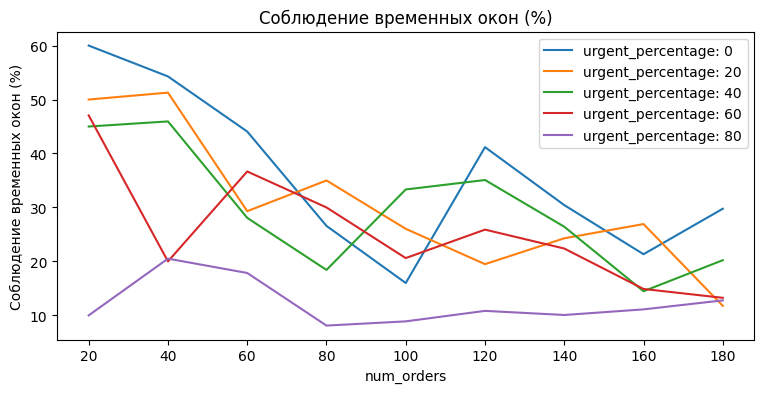

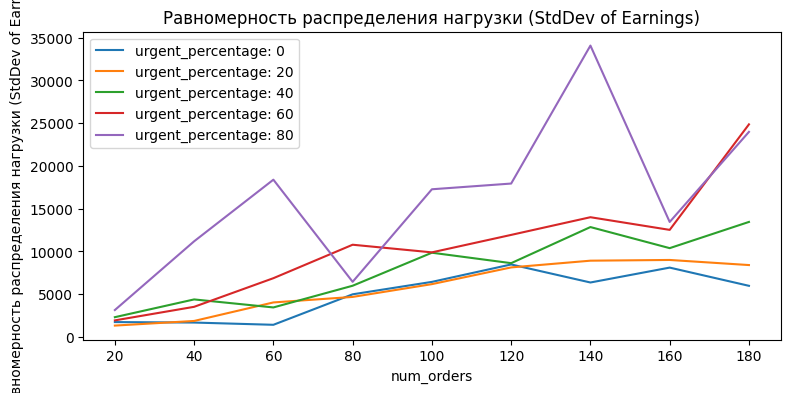

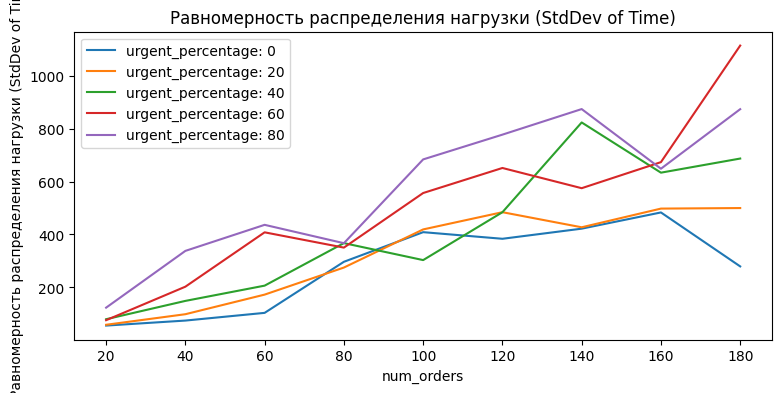

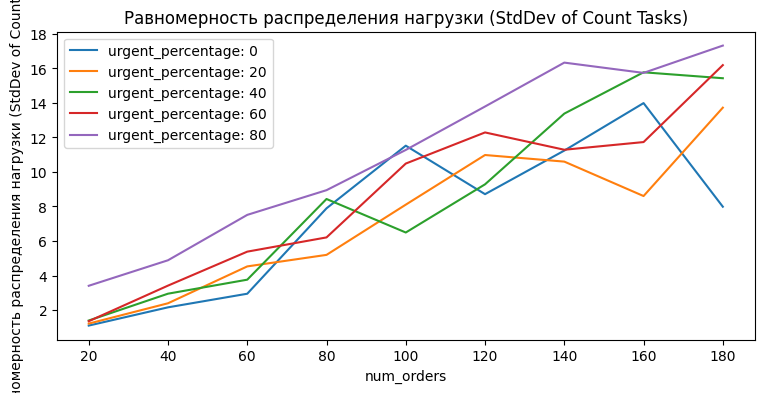

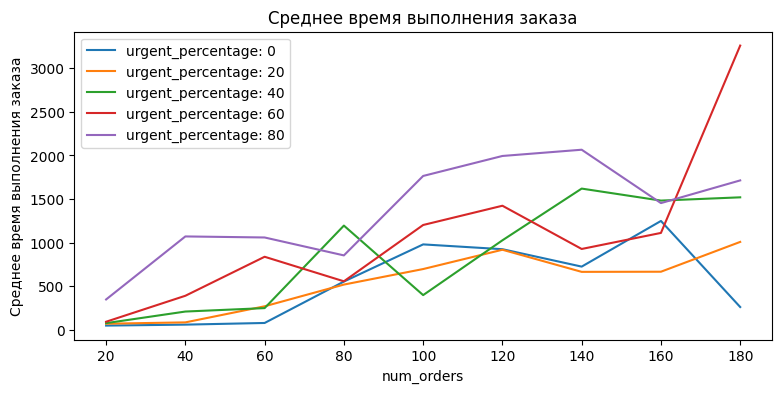

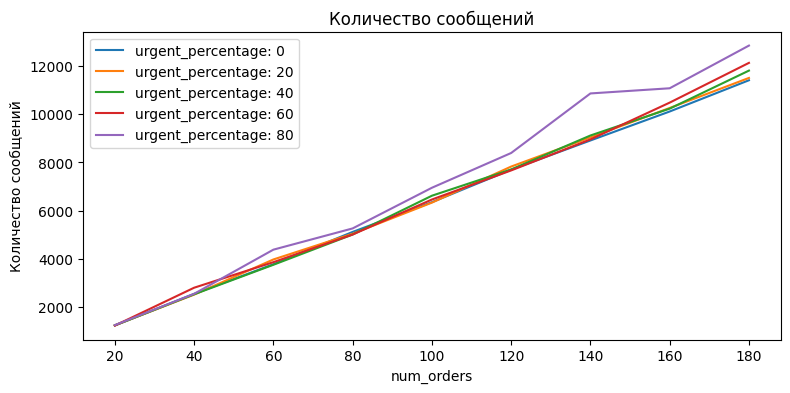

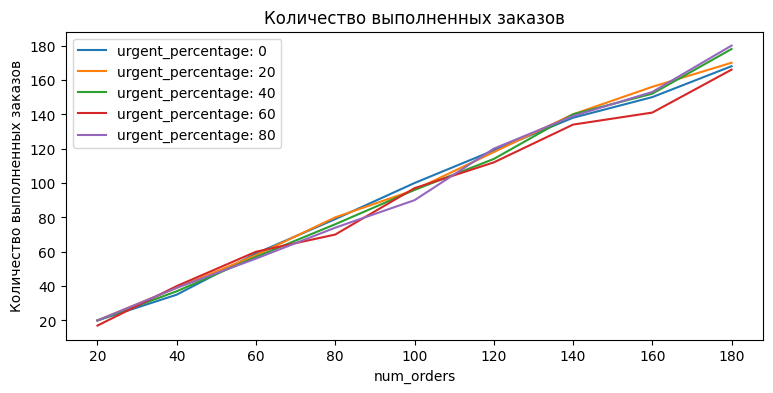

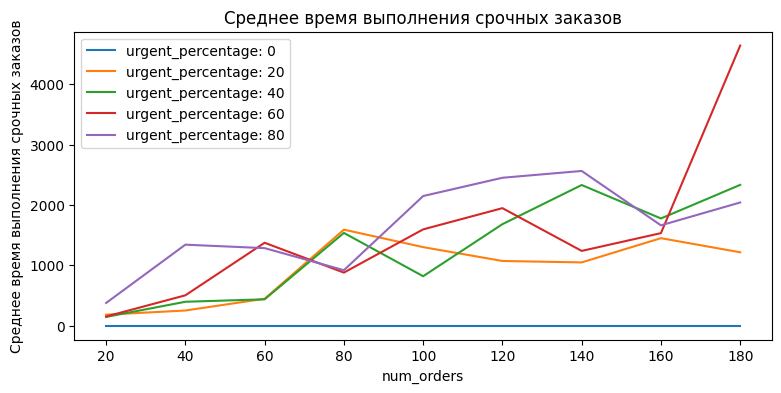

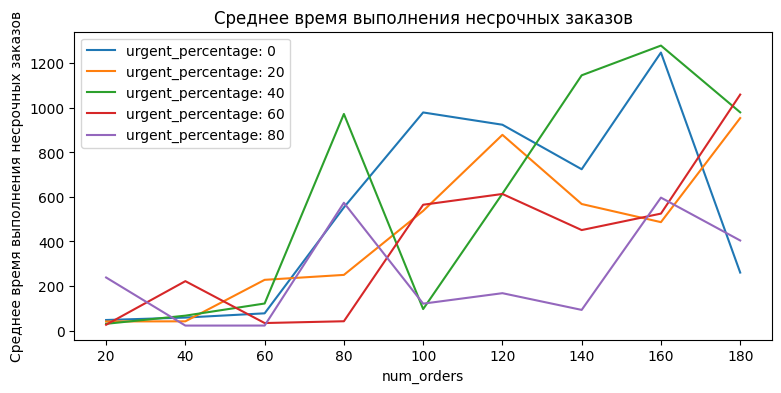

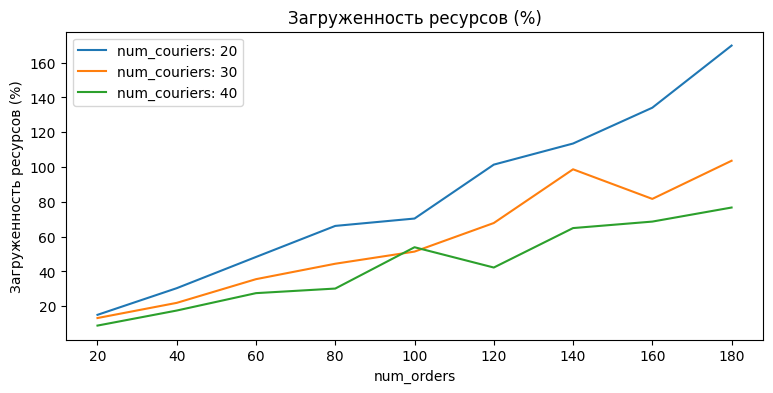

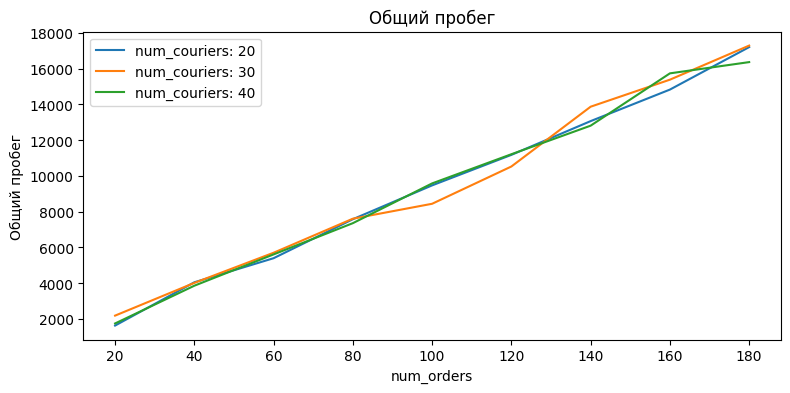

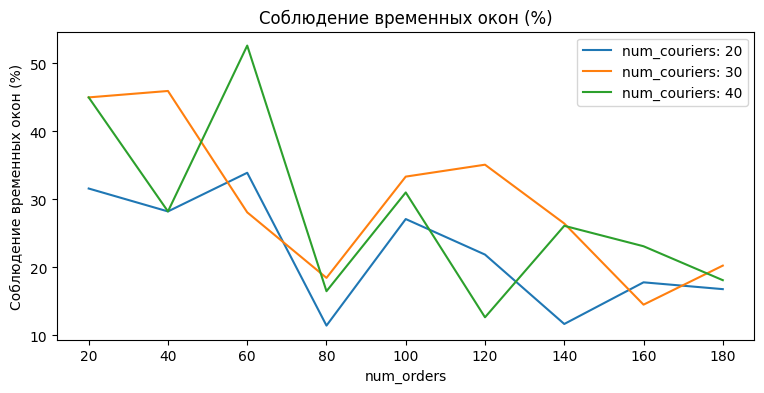

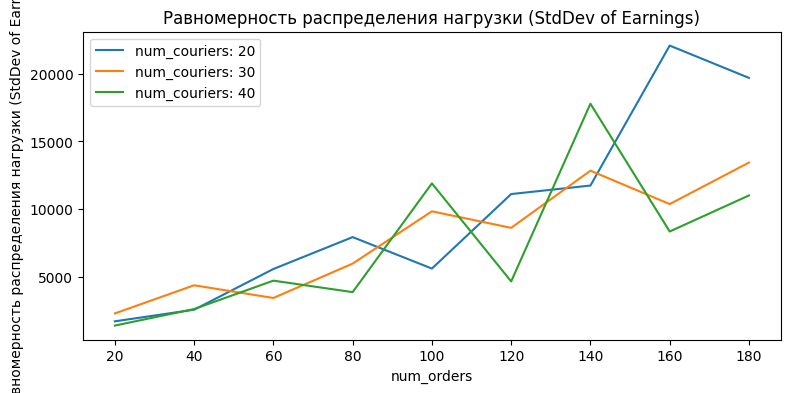

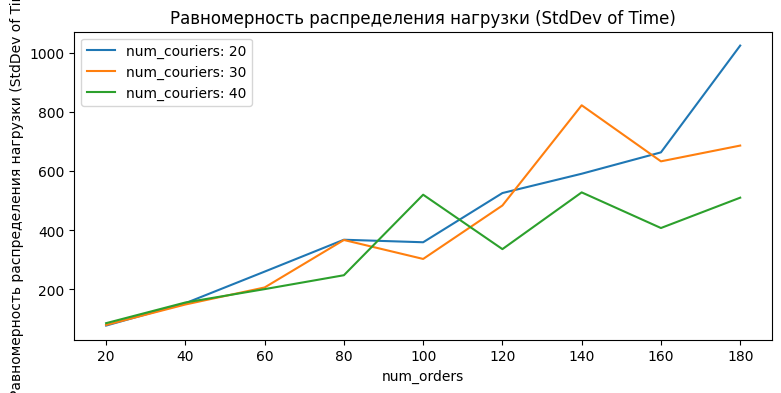

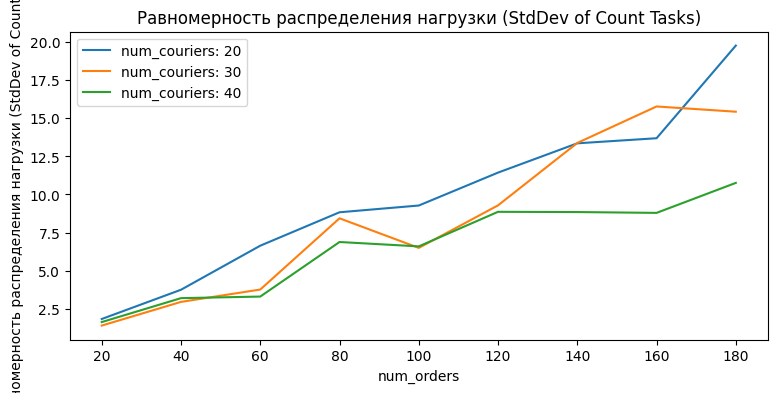

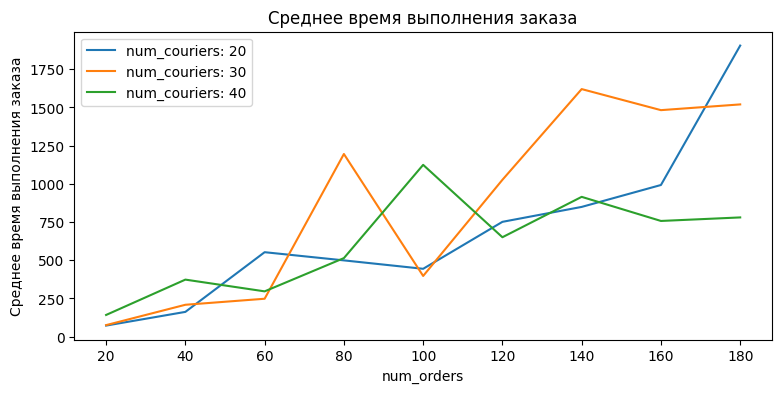

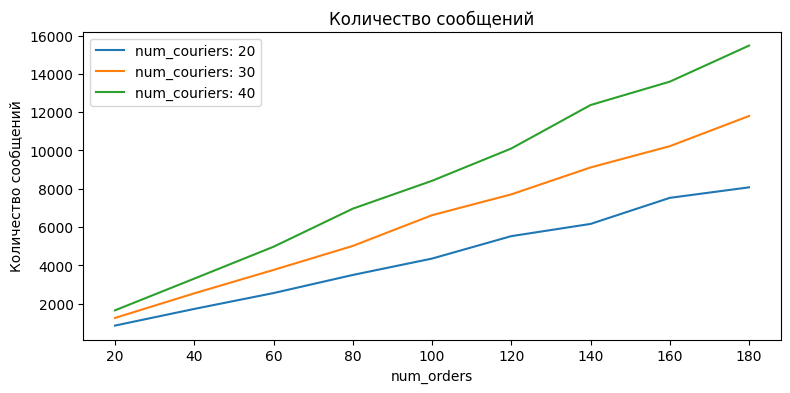

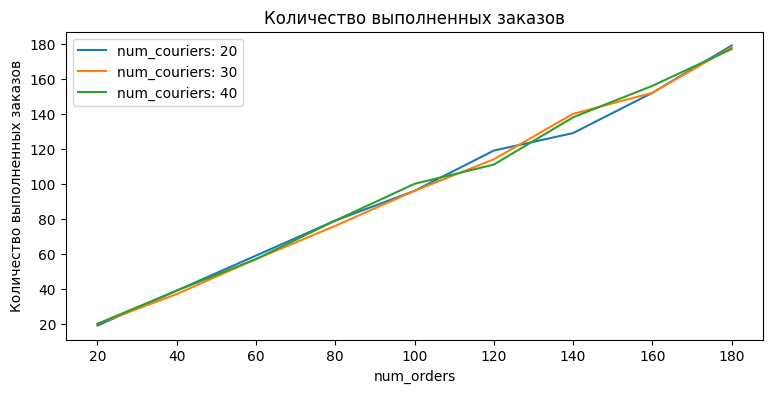

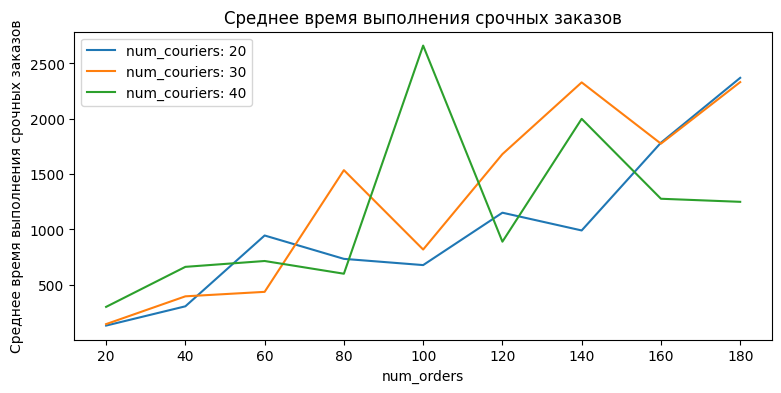

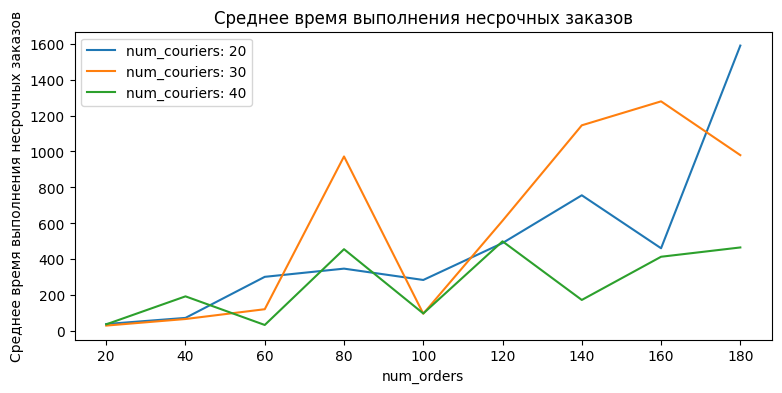

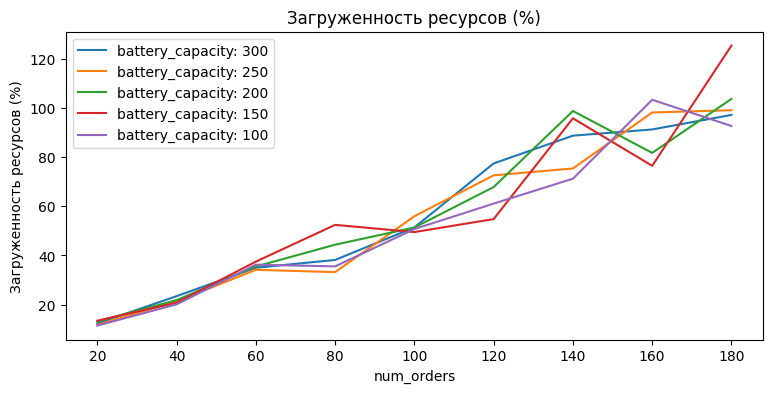

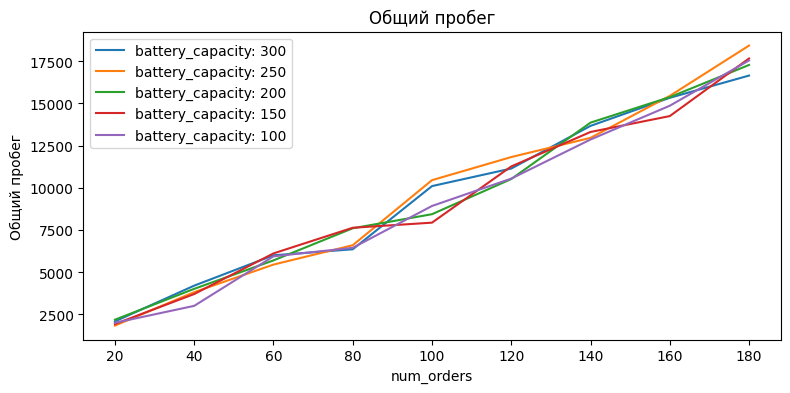

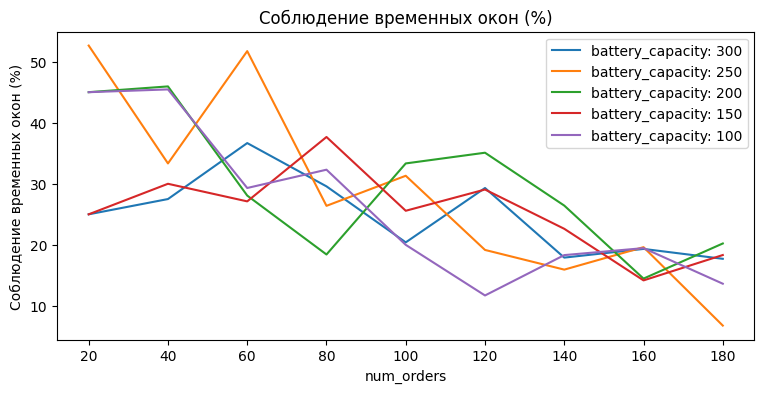

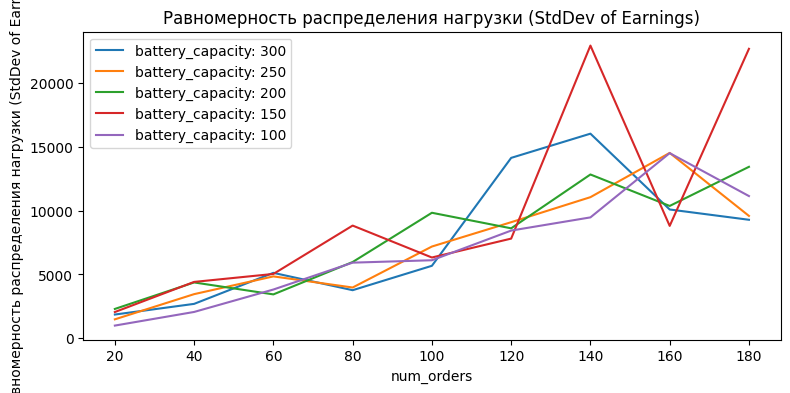

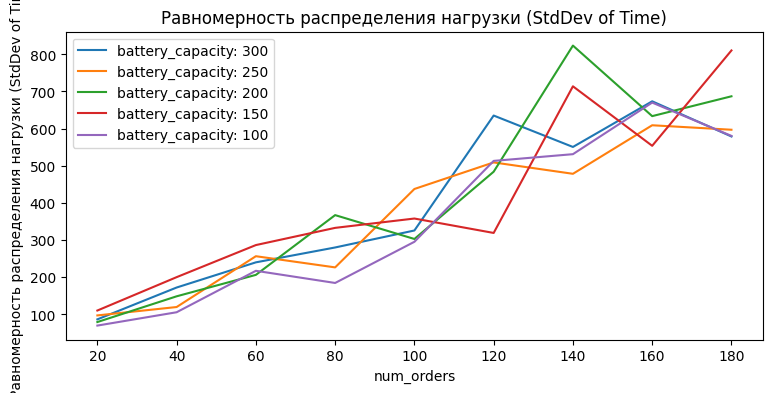

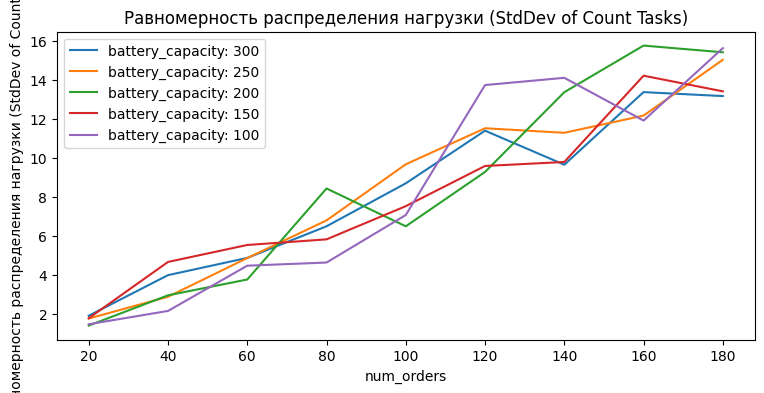

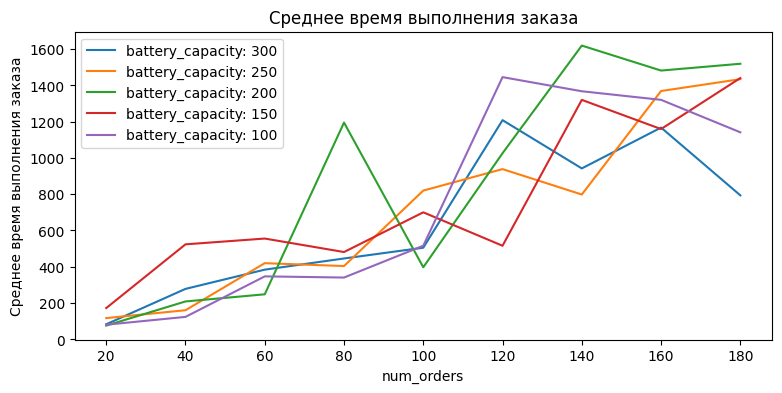

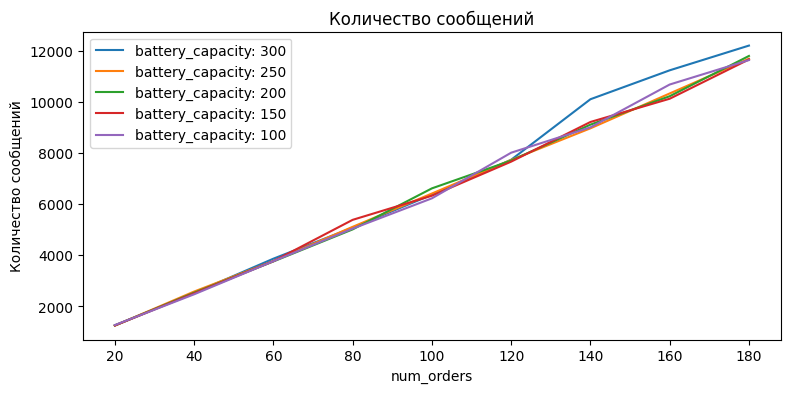

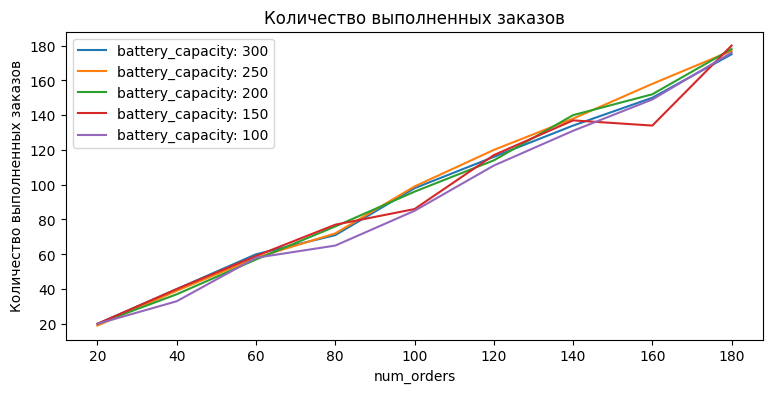

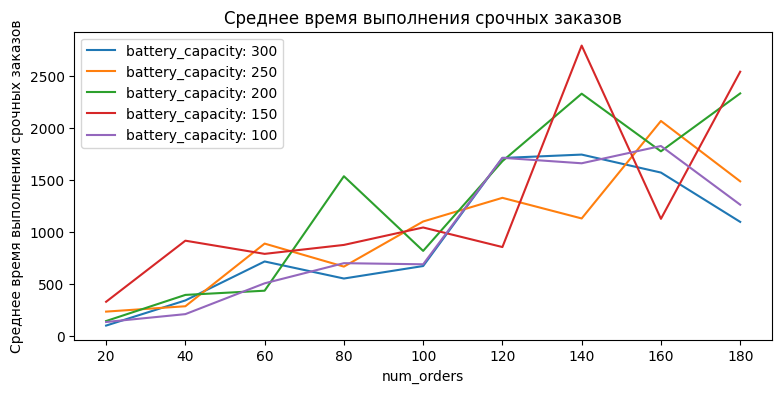

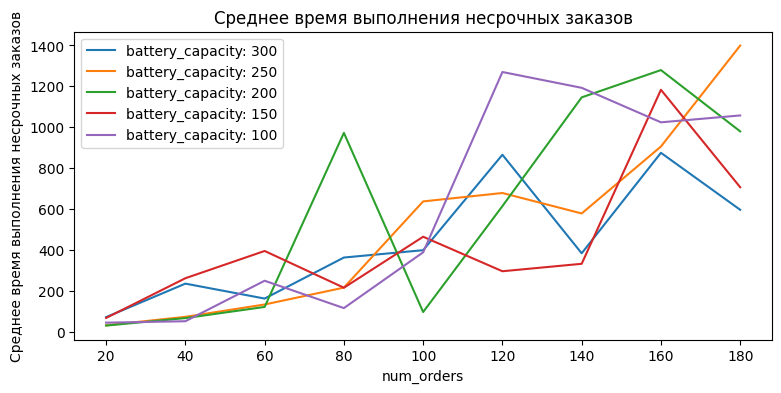

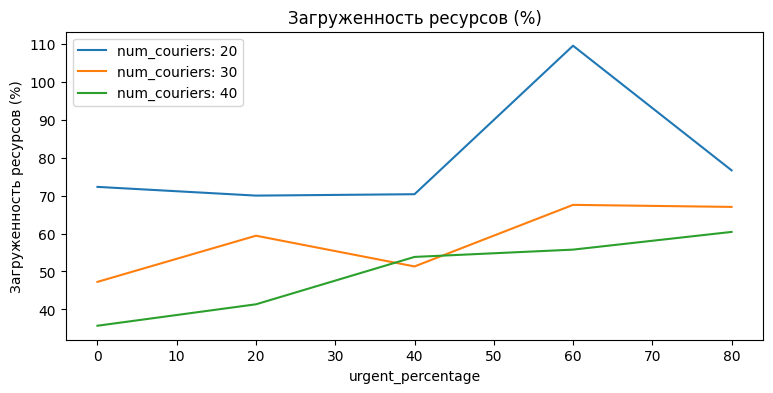

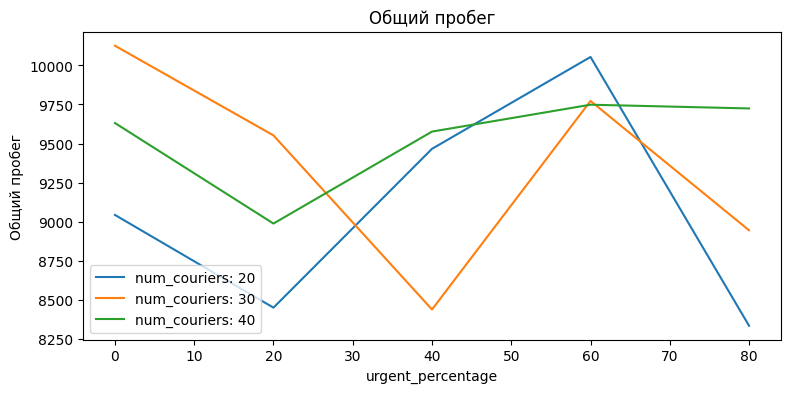

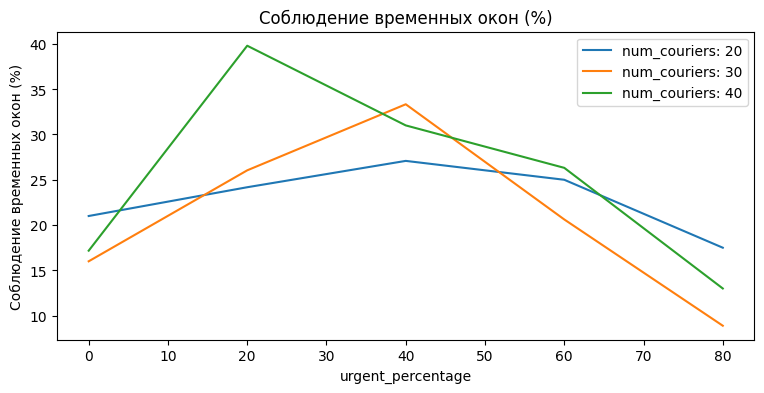

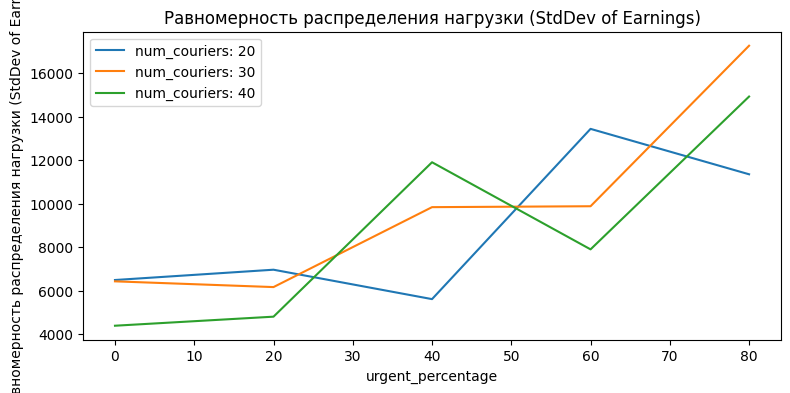

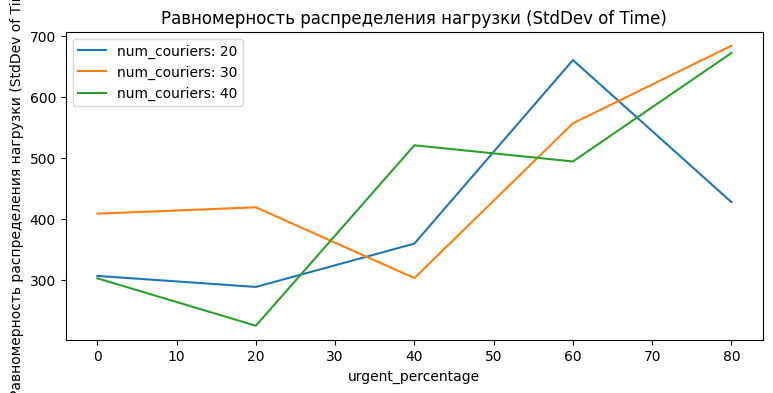

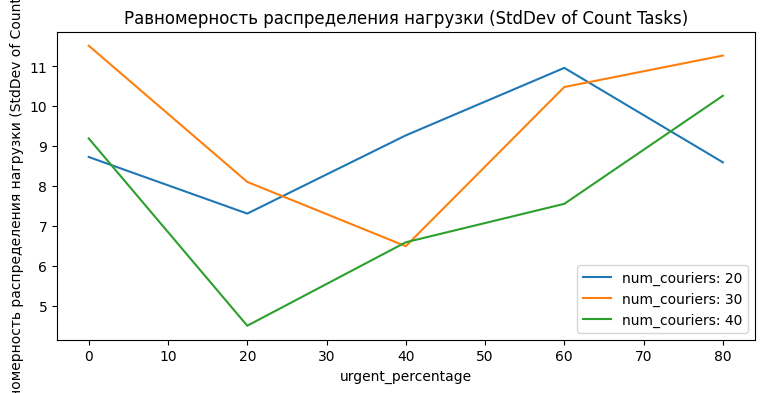

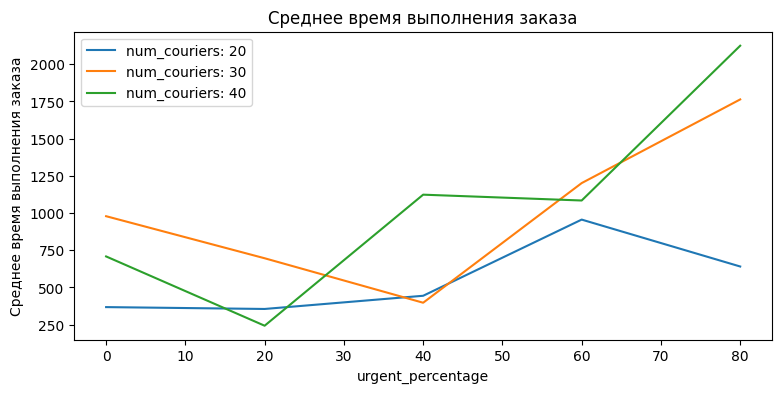

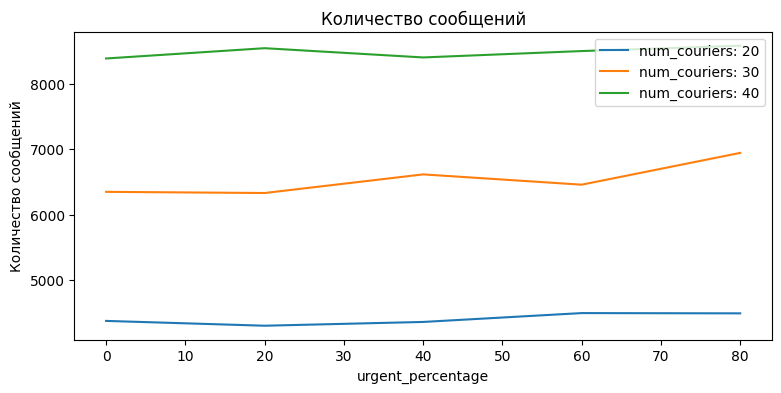

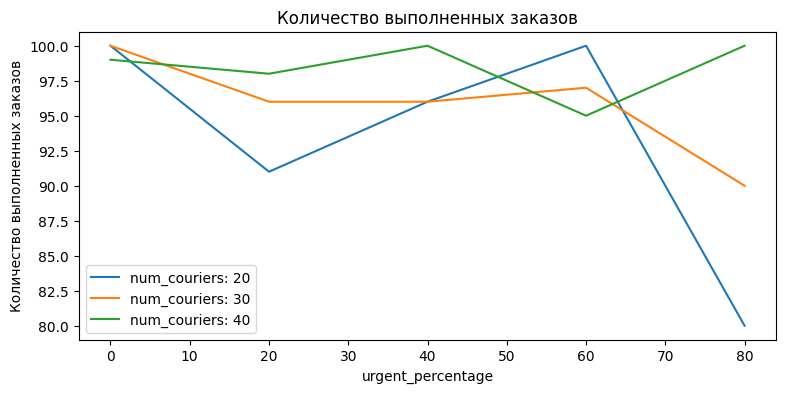

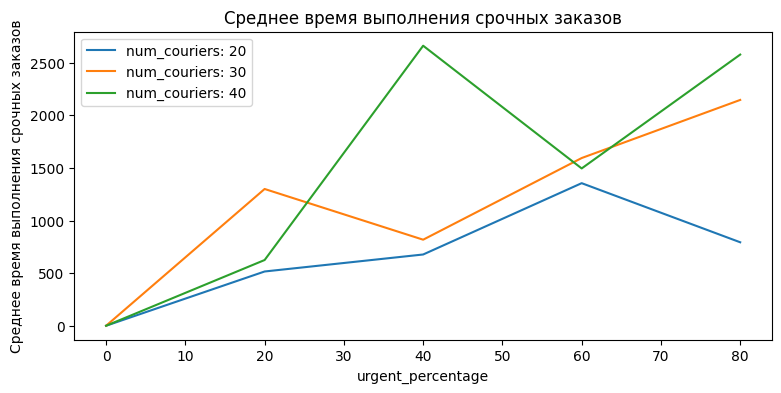

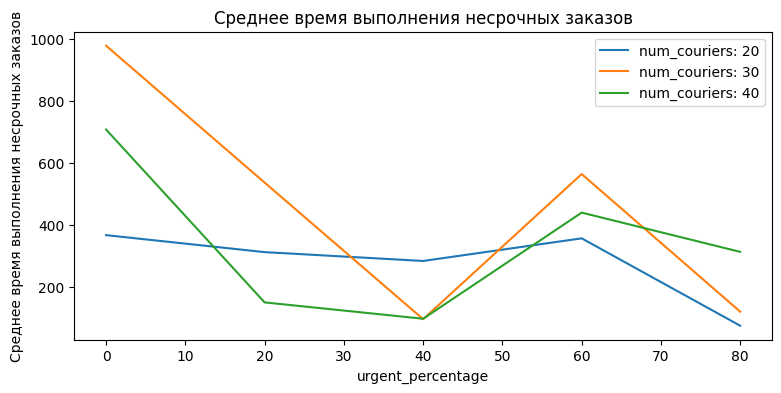

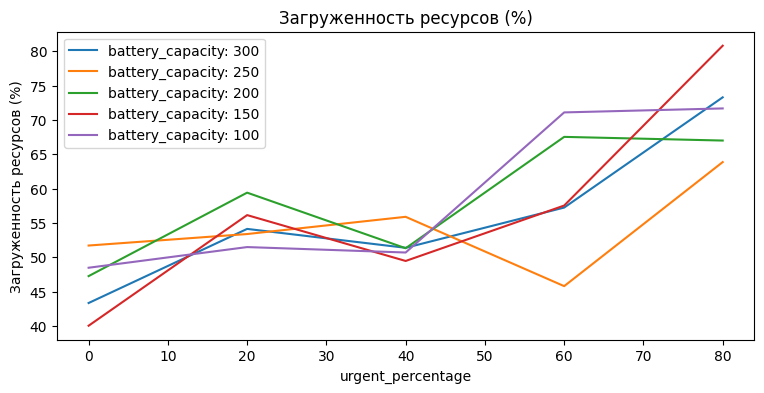

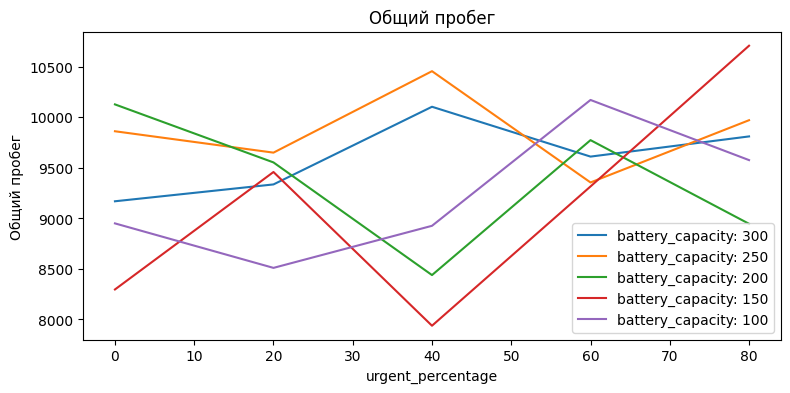

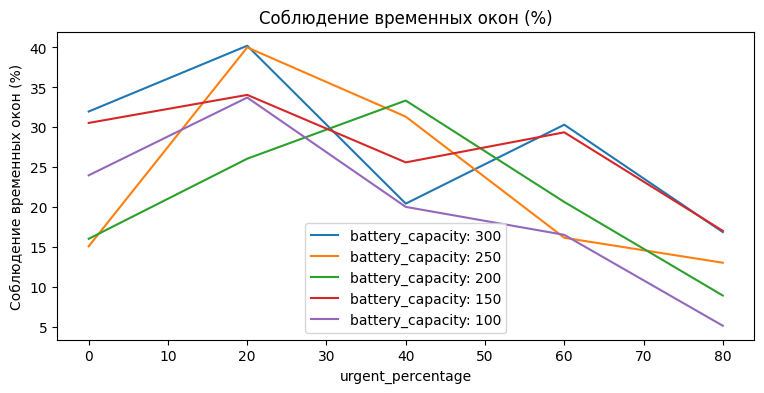

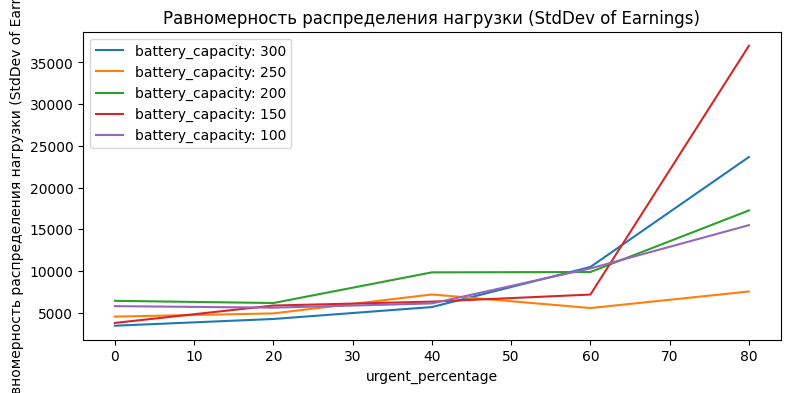

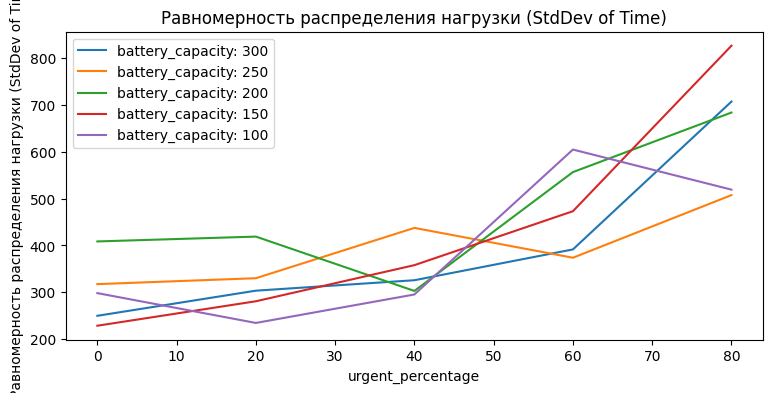

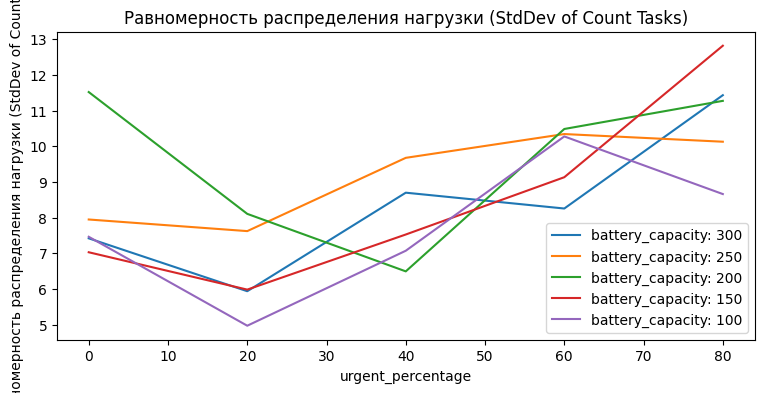

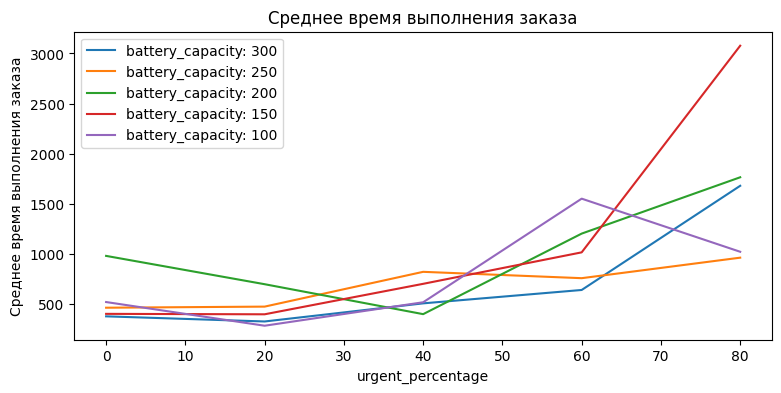

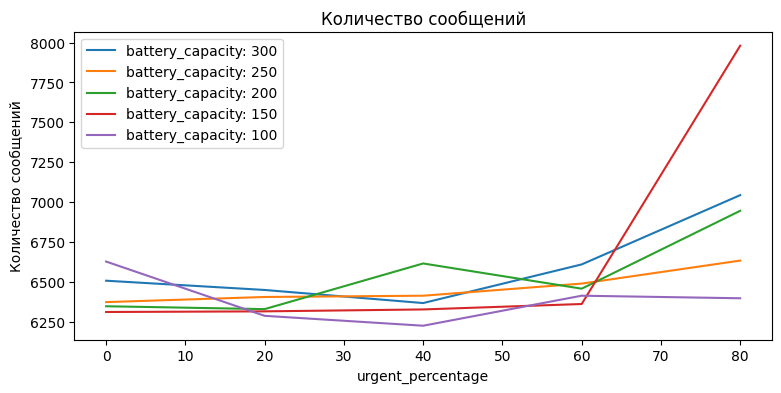

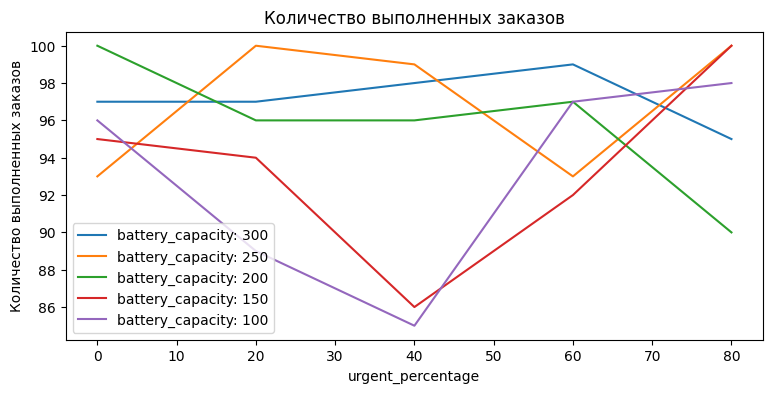

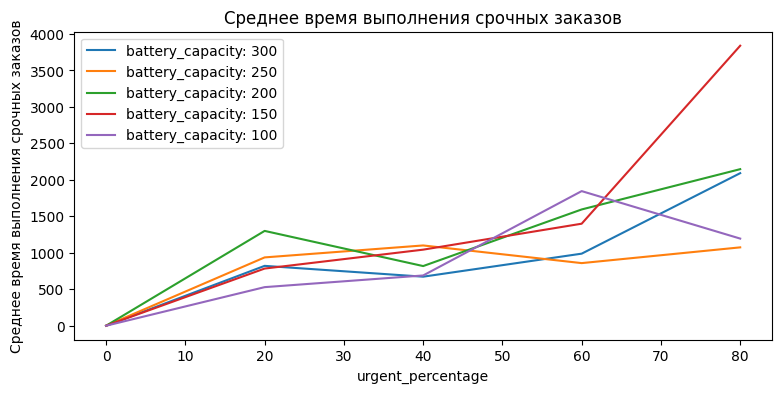

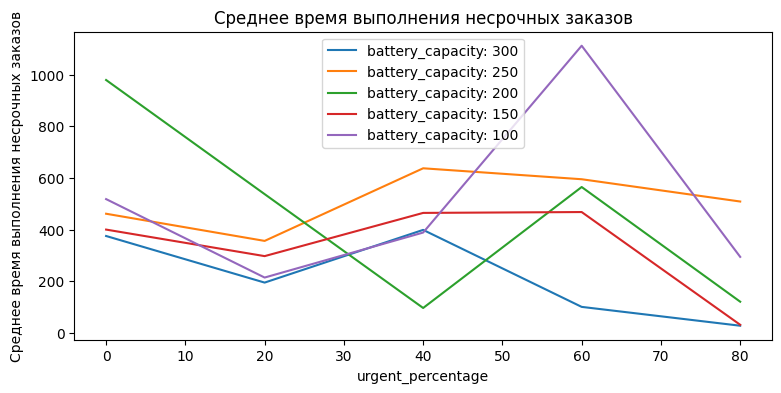

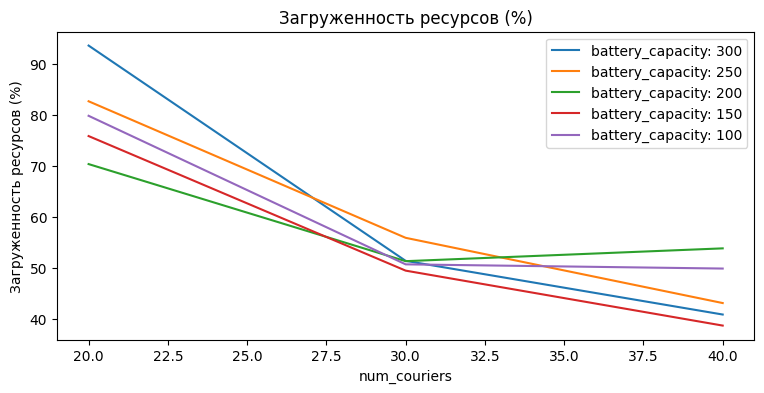

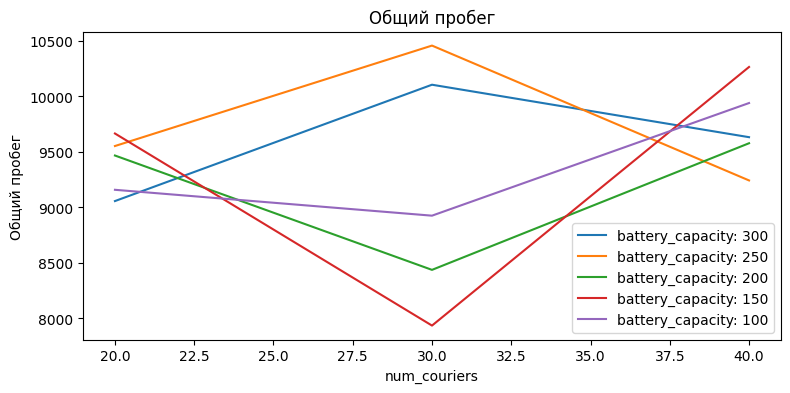

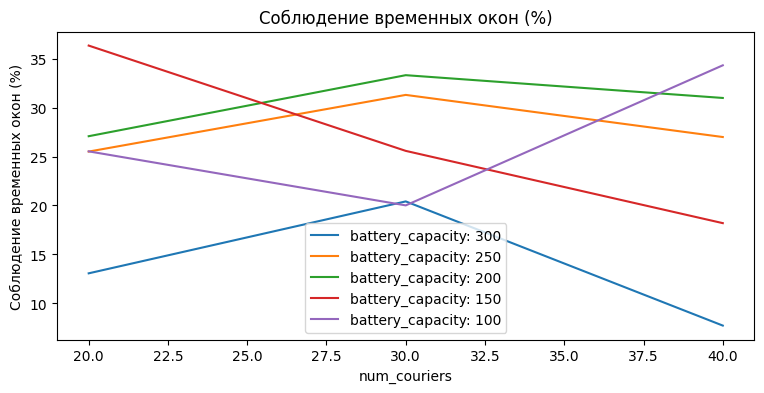

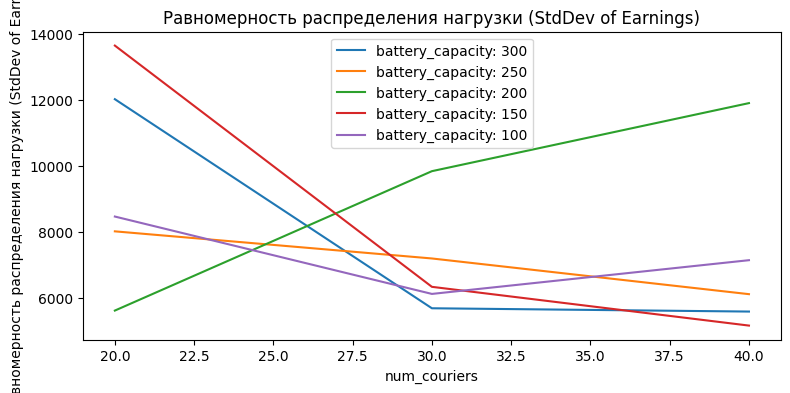

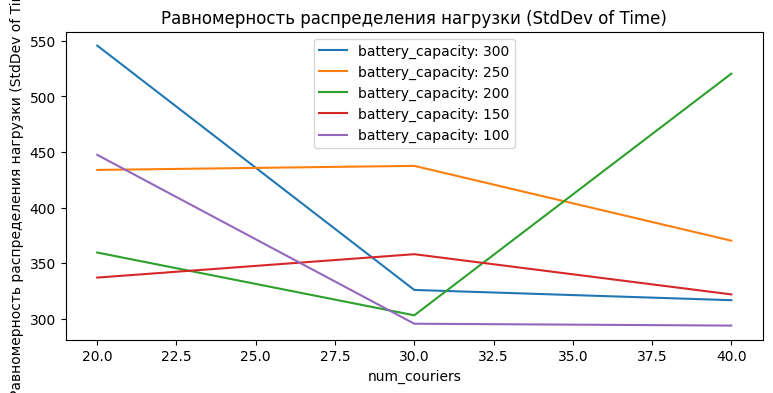

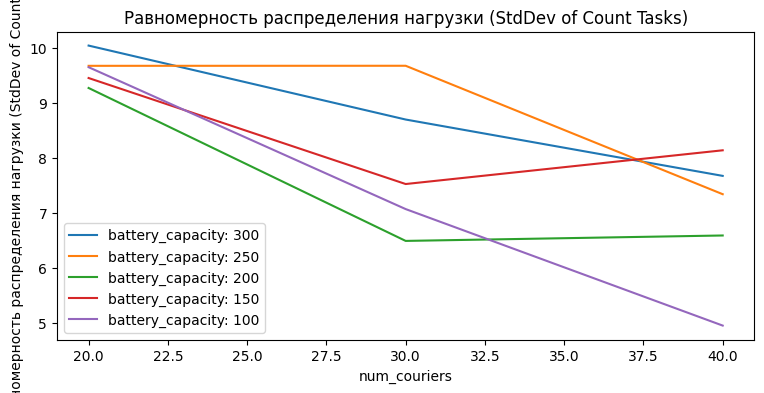

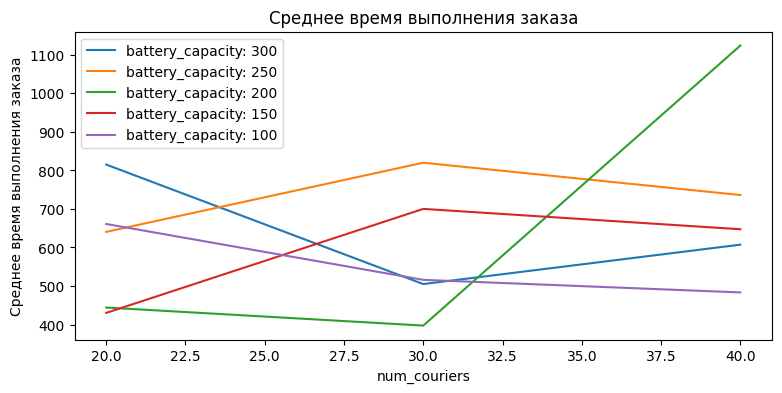

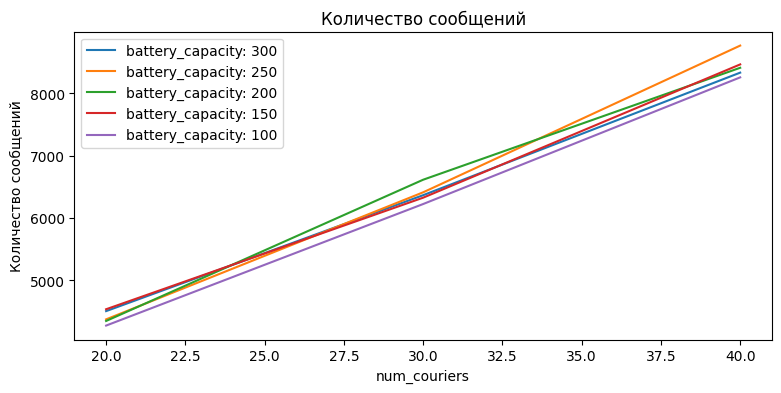

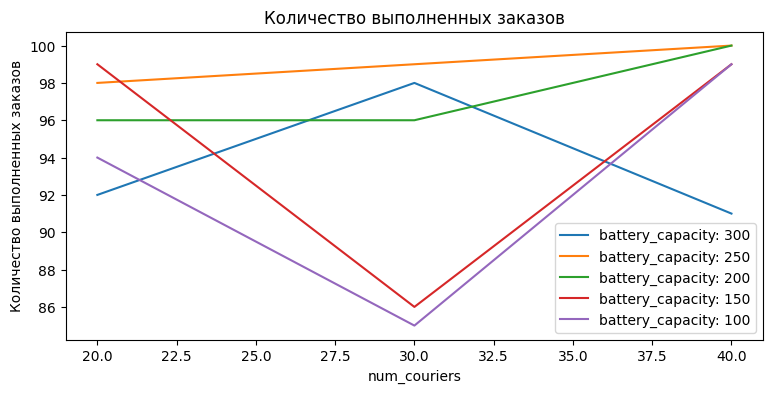

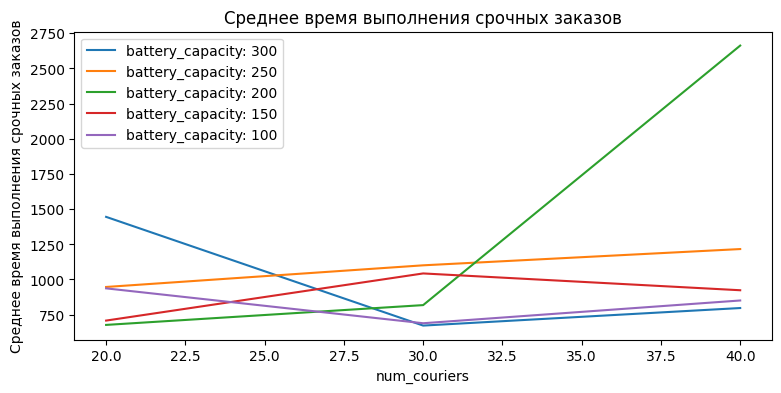

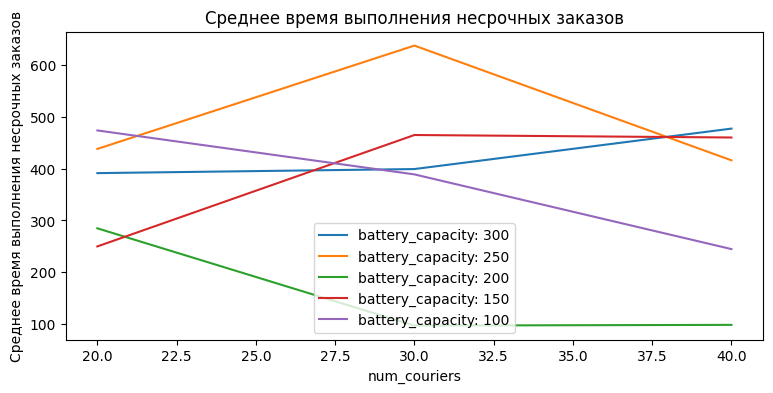

In [34]:
for param1, param2 in itertools.combinations(not_one_unuque_params, 2):
    for col_metr in col_metrics:
        # x y z 
        show_3axis([param1, col_metr, param2])